In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

## generate data

In [2]:
n=100;p=40
density = 0.2
X = np.random.normal(0,1,size=(n,p))
idxs = np.random.choice(p, int(density*p), replace=False)
beta_true = np.random.randn(p)
for idx in idxs:
    beta_true[idx] = 0

Y = X @ beta_true + np.random.normal(0,1,n)
Y[Y>=0] = 1
Y[Y<0] = -1
Y = Y.reshape(n,1)

In [3]:
idxs

array([33, 39, 11,  7, 20,  2, 31, 17])

In [4]:
X_test = np.random.normal(0,1,size=(n,p))
Y_test = X_test @ beta_true + np.random.normal(0,1,n)
Y_test[Y_test >= 0] = 1
Y_test[Y_test < 0] = -1
Y_test = Y_test.reshape(100,1)

## SVM 

In [5]:
beta = cp.Variable((p,1))
lambd = cp.Parameter(nonneg = True)
s1_error = cp.norm(beta,2)
penalty_error = cp.sum(cp.pos(cp.multiply(Y, X @ beta)))
problem = cp.Problem(cp.Minimize(s1_error + lambd*penalty_error))

In [6]:
ite_time = 100
#beta_val = []
train_error = []
test_error = []
lambd_value = np.logspace(-2, 0, num=ite_time)

In [7]:
for val in lambd_value:
    lambd.value = val
    problem.solve()
    
    Y_hat = X @ beta.value
    Y_hat[Y_hat >=0] = 1
    Y_hat[Y_hat < 0] = -1
    train_error.append(np.sum(Y_hat != Y)/n)
    
    Y_test_hat = X_test @ beta.value
    Y_test_hat[Y_test_hat >= 0] = 1
    Y_test_hat[Y_test_hat < 0] = -1
    test_error.append(np.sum(Y_test_hat != Y_test)/n)

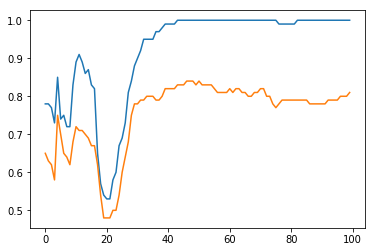

In [8]:
plt.plot(train_error)
plt.plot(test_error)

## sparse SVM 

In [9]:
beta = cp.Variable((p,1))
lambd = cp.Parameter(nonneg = True)
s1_error = cp.norm(beta,1)
penalty_error = cp.sum(cp.pos(cp.multiply(Y, X @ beta)))
problem = cp.Problem(cp.Minimize(s1_error + lambd*penalty_error))

In [10]:
ite_time = 100
#beta_val = []
train_error = []
test_error = []
lambd_value = np.logspace(-3, -1, num=ite_time)

for val in lambd_value:
    lambd.value = val
    problem.solve()
    
    Y_hat = X @ beta.value
    Y_hat[Y_hat >=0] = 1
    Y_hat[Y_hat < 0] = -1
    train_error.append(np.sum(Y_hat != Y)/n)
    
    Y_test_hat = X_test @ beta.value
    Y_test_hat[Y_test_hat >= 0] = 1
    Y_test_hat[Y_test_hat < 0] = -1
    test_error.append(np.sum(Y_test_hat != Y_test)/n)

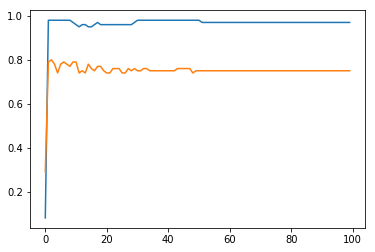

In [11]:
plt.plot(train_error)
plt.plot(test_error)

对于高维问题，如果不使用sparse svm，准确率很差，需要用sparse调参，准确率会上升